___

<a href='https://plotly.com/python/'> <img src='https://plotly.com/all_static/images/plotly_graphing_libraries_1.png' /></a>
___

# Mapas de Coropletas - Ejercicio

En este ejercicio, tenemos algunos conjuntos de datos simples y se le pide que cree mapas de coropletas a partir de ellos. Puede revisar la documentacion de Plotly [Full Documentation Reference](https://plot.ly/python/reference/#choropleth)

## Importar Plotly

In [1]:
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True) 

**Importar pandas y leer el archivo csv: 2014_World_Power_Consumption**

In [2]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('2014_World_Power_Consumption')

**Revisar las  primeras observaciones del Dataframe (head).**

In [5]:
df.head(4)

,Country,Power Consumption KWH,Text
0,China,5.523000e+12,"China 5,523,000,000,000"
1,United States,3.832000e+12,"United 3,832,000,000,000"
2,European,2.771000e+12,"European 2,771,000,000,000"
3,Russia,1.065000e+12,"Russia 1,065,000,000,000"


In [6]:
dfCountries = pd.read_csv('2014_World_GDP')
df = dfCountries[['COUNTRY','CODE']].merge(df, how = 'inner', left_on = 'COUNTRY', right_on = 'Country')

**Cree una gráfica coropleta del consumo de energía de los países utilizando el diccionario de diseño y datos.**

In [7]:
data = dict (
        type = 'choropleth',
        colorscale = 'Viridis_r',
        locations = df['CODE'],
        z = df['Power Consumption KWH'],
        text = df['Country'],
        colorbar = {'title' : 'Power Consumption KWH'}
)

In [8]:
layout = dict(
        title = '2014 - Consumo de Energia (KWH) por Países',
        geo = dict (
            showframe = False,
            projection = {'type' : 'mercator'}
        )
)

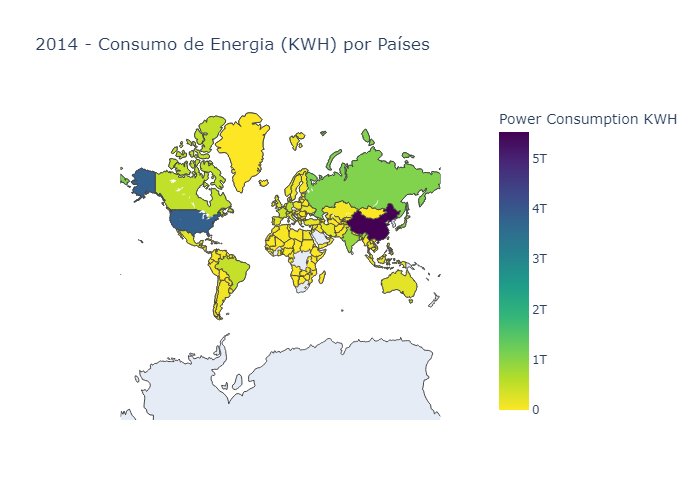

In [9]:
choromap = go.Figure(data = [data],layout = layout)
#$ pip install -U kaleido
choromap.show("png")

#configure_plotly_browser_state()
#iplot(choromap,validate=False)

## USA Coropleta

**Importe el archivo csv 2012_Election_Data utilizando pandas.**

In [10]:
df2 = pd.read_csv('2012_Election_Data')

**Revisar las  primeras observaciones del Dataframe (head).**

In [11]:
df2.head(5)

,Year,ICPSR State Code,Alphanumeric State Code,State,VEP Total Ballots Counted,VEP Highest Office,VAP Highest Office,Total Ballots Counted,Highest Office,Voting-Eligible Population (VEP),Voting-Age Population (VAP),% Non-citizen,Prison,Probation,Parole,Total Ineligible Felon,State Abv
0,2012,41,1,Alabama,NaN,58.6%,56.0%,NaN,"2,074,338","3,539,217",3707440.0,2.6%,"32,232","57,993","8,616","71,584",AL
1,2012,81,2,Alaska,58.9%,58.7%,55.3%,"301,694","300,495","511,792",543763.0,3.8%,"5,633","7,173","1,882","11,317",AK
2,2012,61,3,Arizona,53.0%,52.6%,46.5%,"2,323,579","2,306,559","4,387,900",4959270.0,9.9%,"35,188","72,452","7,460","81,048",AZ
3,2012,42,4,Arkansas,51.1%,50.7%,47.7%,"1,078,548","1,069,468","2,109,847",2242740.0,3.5%,"14,471","30,122","23,372","53,808",AR
4,2012,71,5,California,55.7%,55.1%,45.1%,"13,202,158","13,038,547","23,681,837",28913129.0,17.4%,"119,455",0,"89,287","208,742",CA


**Ahora cree una gráfica que muestre la población en edad de votar (VAP) por Estado. Si luego desea probar con otras columnas, hay que asegurarse de considerar el tipo de datos. VAP ya se ha transformado a un tipo de dato float**

In [12]:
#Variable data
data = {
    'type': 'choropleth',
    'locations': df2['State Abv'],
    'locationmode': 'USA-states',
    'colorscale': 'Viridis_r',
    'text': df2['State'],
    'z': df2['Voting-Age Population (VAP)'],
    'colorbar': {'title': 'Poblacion de USA en edad de votar'}
}

In [13]:
#Variable layout
layout = {
    'title' : '2012 - Datos de votación de las Elecciones Generales',
    'geo' : { 'scope' : 'usa' }
}

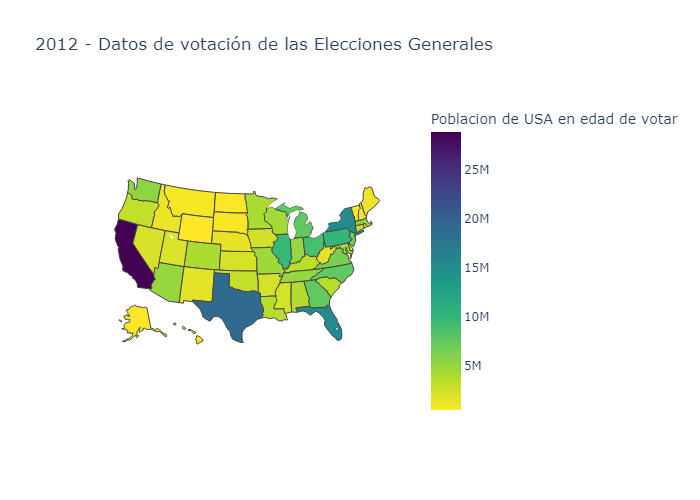

In [14]:
choromap = go.Figure(data = [data],layout = layout)
choromap.show("png")
#iplot(choromap,validate=False)

# Buen trabajo!